In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adchance/Admission Chance.csv


In [130]:
df = pd.read_csv('/kaggle/input/adchance/Admission Chance.csv')
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [131]:
df.rename(columns = {"Chance of Admit ": "Admit_Chance"}, inplace = True)

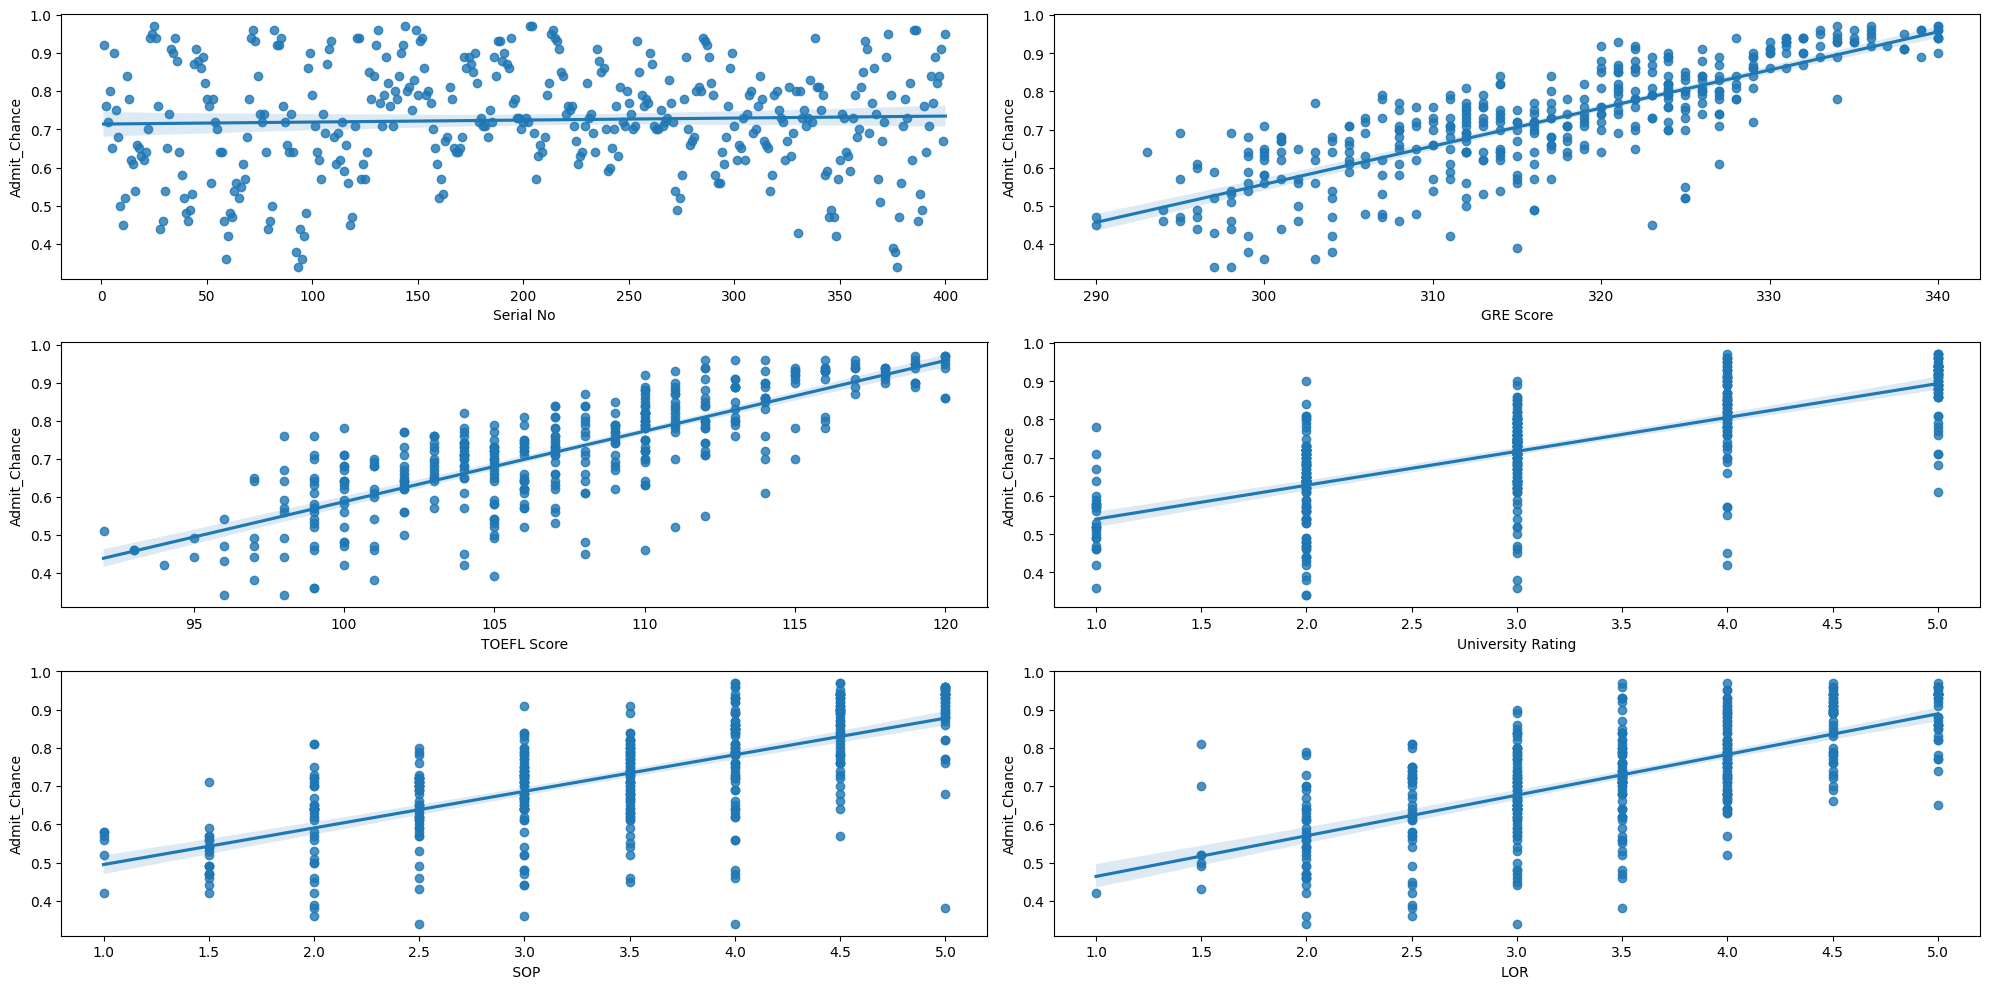

In [132]:
%matplotlib inline
fig, axis = plt.subplots(3, 2, figsize = (20, 10))
plt.subplots_adjust(hspace = 0.5)
for col, ax in zip(df.columns.values.tolist(), axis.ravel()):
    sns.regplot(data = df, x = col, y = "Admit_Chance", ax = ax)
    
plt.tight_layout()
plt.show()

In [133]:
df.drop(columns = ["Serial No"], inplace = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

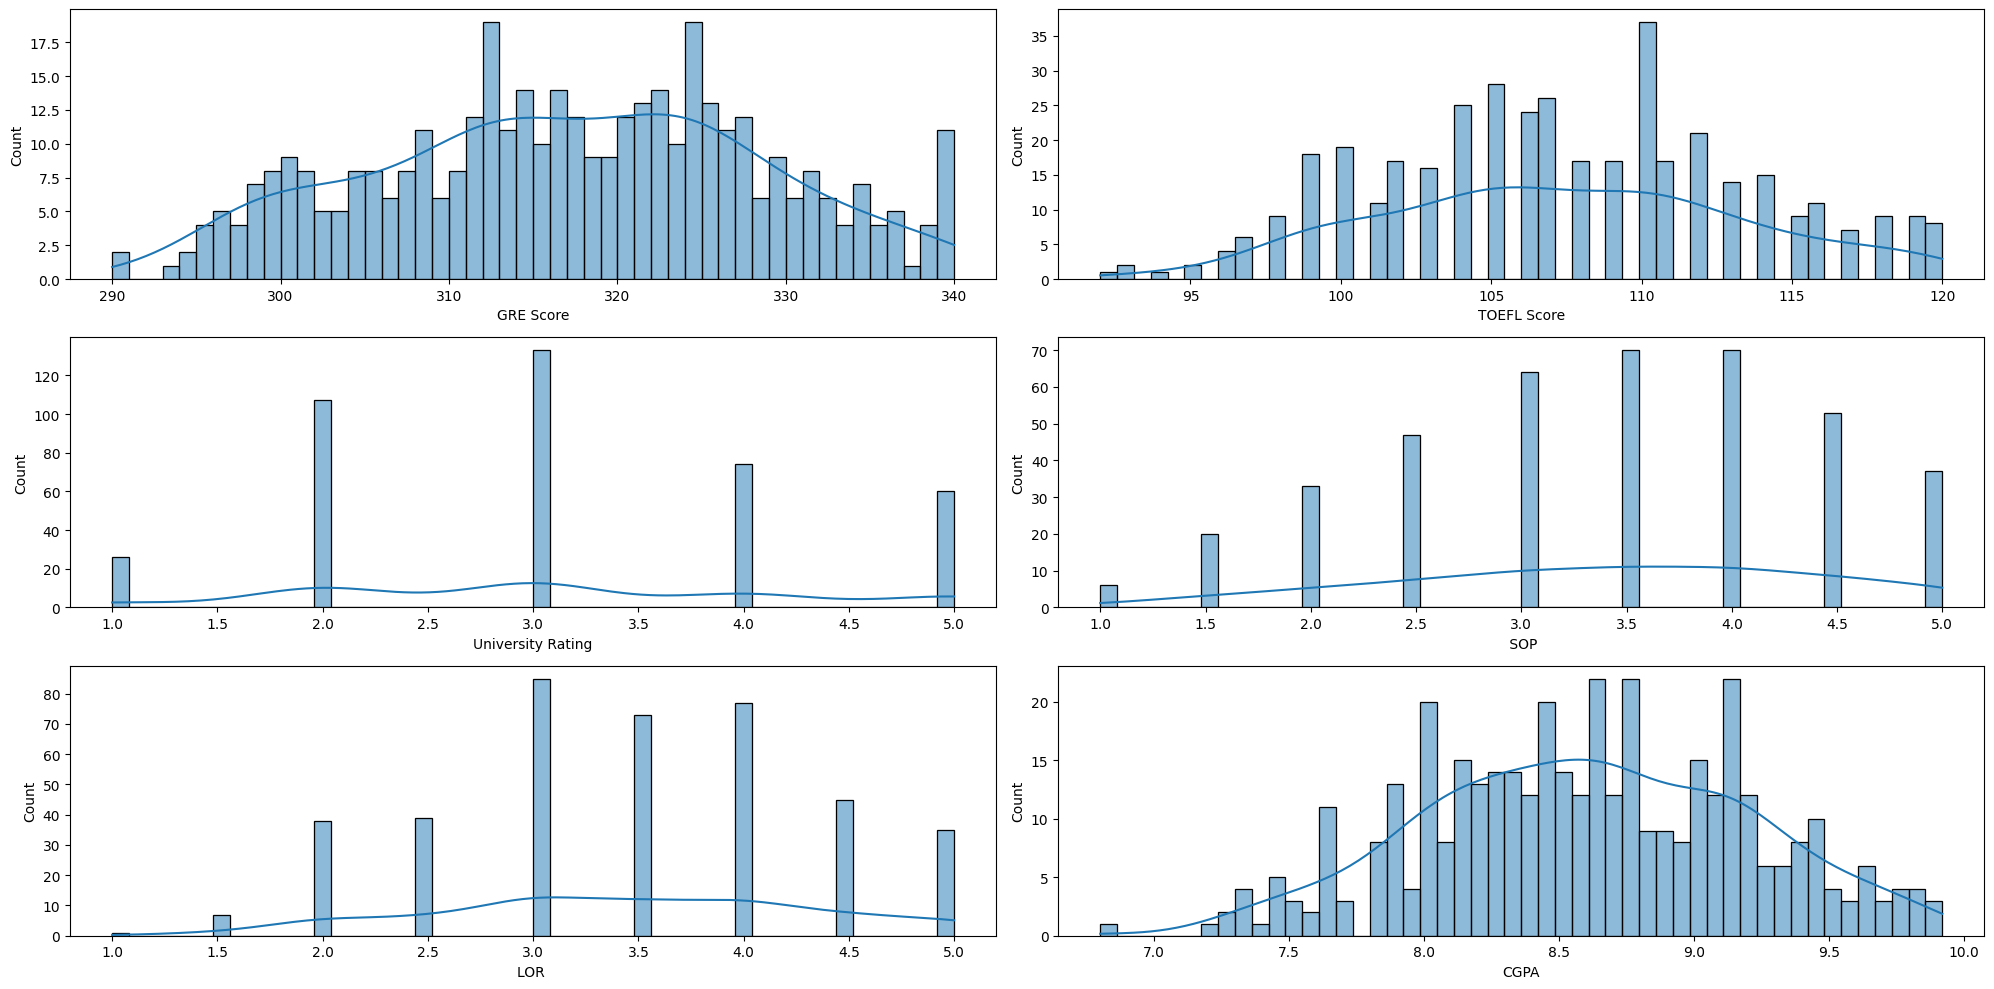

In [134]:
%matplotlib inline
fig, axis = plt.subplots(3, 2, figsize = (20, 10))
plt.subplots_adjust(hspace = 0.5)
for col, ax in zip(df.columns.values.tolist(), axis.ravel()):
    sns.histplot(data = df, x = df[col], ax = ax, bins = 50, kde = True)
    
plt.tight_layout()
plt.show()

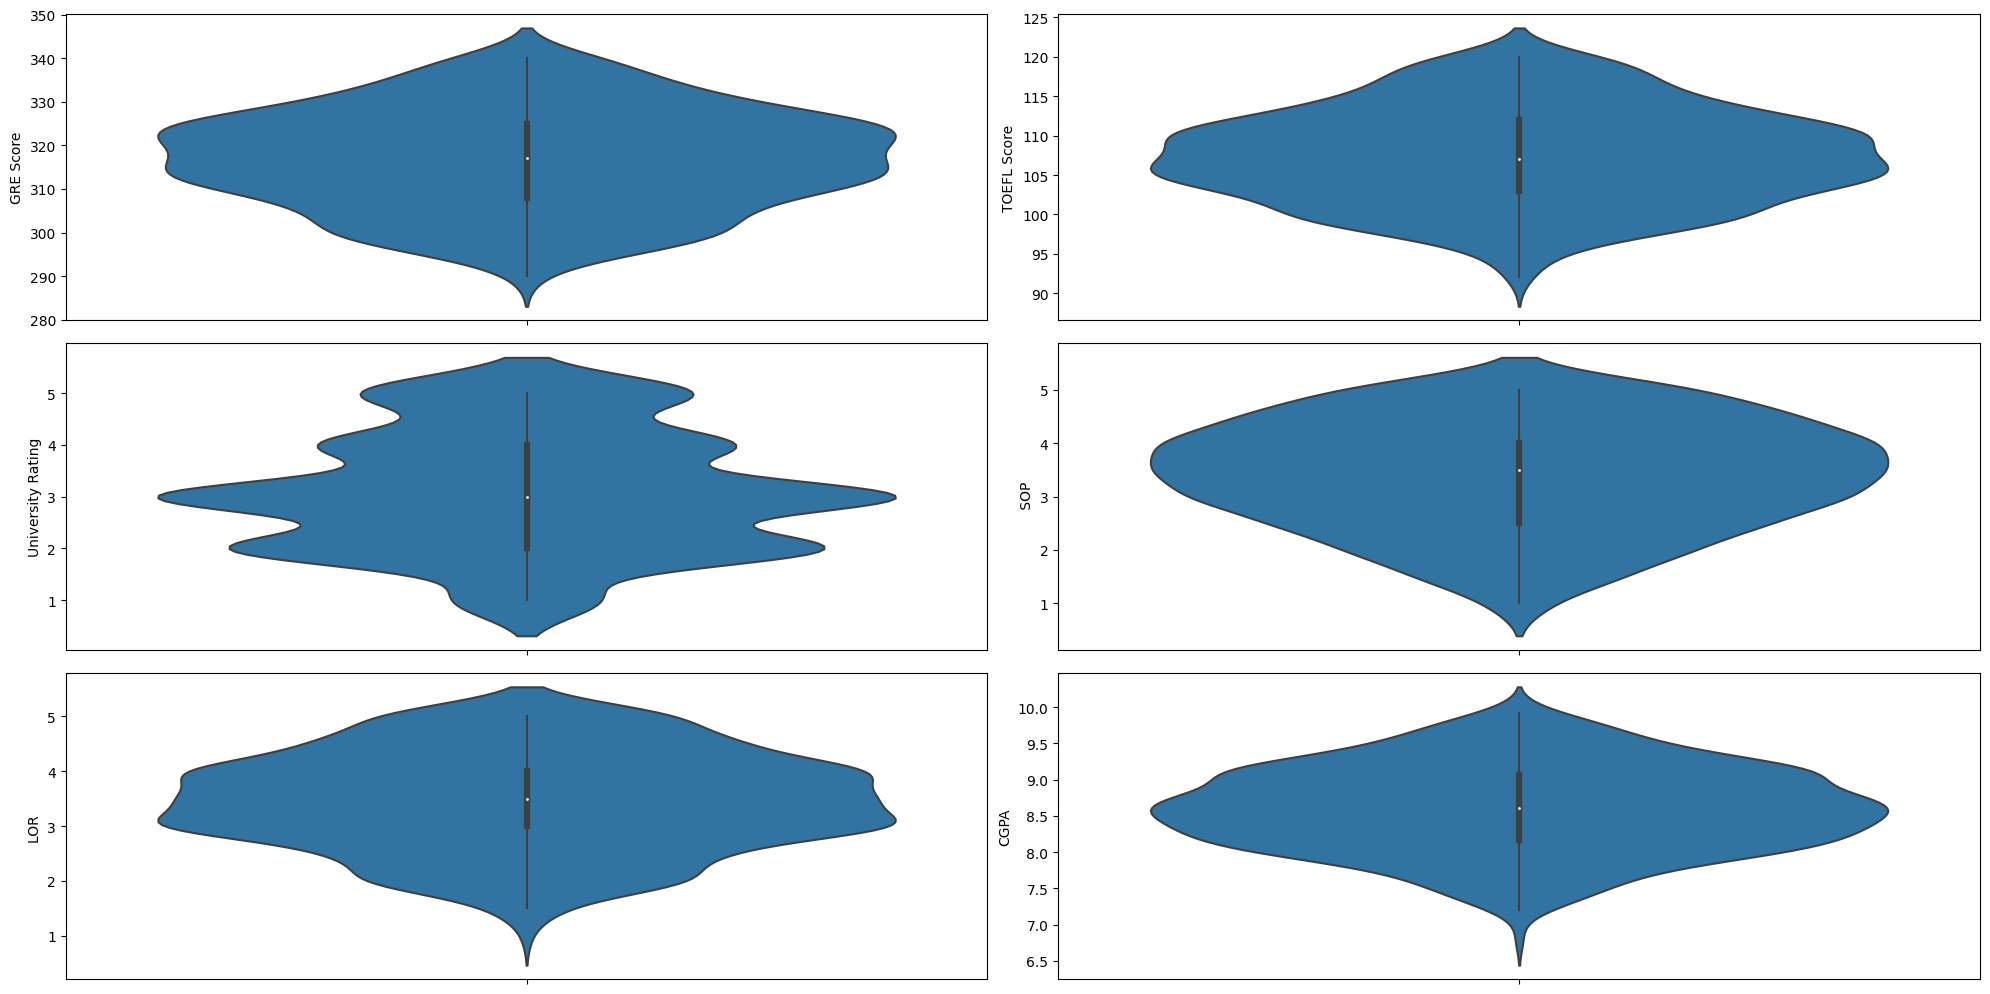

In [139]:
%matplotlib inline
fig, axis = plt.subplots(3, 2, figsize = (20, 10))
plt.subplots_adjust(hspace = 0.5)
for col, ax in zip(df.columns.values.tolist(), axis.ravel()):
    sns.violinplot(data = df, y = df[col], ax = ax, bins = 50, kde = True)
    
plt.tight_layout()
plt.show()

#### We can see a positive correlation for all the features except serial No.

In [135]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [138]:
ydf = pd.DataFrame(y_test, columns = ["Actual Value"])
preddf = pd.DataFrame(regressor.predict(X_test), columns = ["Predicted Value"])
findf = pd.concat([preddf, ydf], axis = 1)
print(f"Mean squared error for this model is: {mse(y_test, regressor.predict(X_test))}")

Mean squared error for this model is: 3.0814879110195775e-34
